### 导包

In [1]:
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import Dense,Activation,Input
from keras.optimizers import RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


### 数据预处理

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #每一张图片的大小是28×28×1

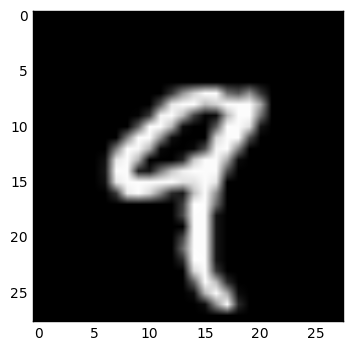

In [3]:
im = plt.imshow(x_train[4],cmap="gray") #灰度图
plt.show()

In [3]:
print(x_train.shape,y_train.shape) #导入6000张28*28的图片
print(x_train[0].shape)

(60000, 28, 28) (60000,)
(28, 28)


In [3]:
#数据标准化（normalize）,使得每个像素值在0-1之间
x_train = x_train.reshape(x_train.shape[0],-1) / 255
x_test = x_test.reshape(x_test.shape[0],-1) / 255

In [4]:
#将标签y变成“one-hot”形式
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)

In [7]:
x_train[1].shape

(784,)

In [8]:
y_train[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

### 建立神经网络

In [5]:
#序贯模型
model = Sequential([
        Dense(32,input_dim=784), #32是输出的维度（传出32个feature），784是输入的维度
        Activation('relu'), #经过激励函数之后，就变成了非线性的数据
        Dense(10), #输出10个feature
        Activation('softmax')
    ])

#函数模型
# input = Input(shape=(784,))
# layer1 = Dense(512,activation='relu')(input)
# layer2 = Dense(512,activation='relu')(layer1)
# pred = Dense(10,activation='softmax')(layer2)
# model = Model(inputs=input,outputs=pred)

In [21]:
model.summary() #打印出模型概况
model.get_config() #返回包含模型配置信息的Python字典

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


[{'class_name': 'Dense',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 784),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_4',
   'trainable': True,
   'units': 32,
   'use_bias': True}},
 {'class_name': 'Activation',
  'config': {'activation': 'relu', 'name': 'activation_1', 'trainable': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    

In [6]:
#自定义优化器
rmsprop = RMSprop(lr=0.001,rho=0.9,epsilon=1e-8,decay=0.0)

### 激活模型

In [7]:
#使用自定义的优化器，损失函数使用交叉熵函数（不同于回归问题）
model.compile(optimizer=rmsprop,loss='categorical_crossentropy',metrics=['accuracy']) 
#metrics：列表，包含评估模型在训练和测试时的网络性能的指标（cost，accuracy，score等）

### 训练模型
* keras的在训练（fit）的过程中，显式地生成log日志；使用tf的tensorboard来解析这个log日志，并且通过网站的形式显示出来（将keras的训练过程动态的、直观地显示出来）
* cmd命令行下：tensorboard --logdir=日志的完整路径(浏览器进行查看)

In [8]:
from keras.callbacks import TensorBoard
#在训练数据上按batch进行一定次数的迭代来训练网络
model.fit(x_train,y_train,epochs=2,batch_size=32,callbacks=[TensorBoard(log_dir='./logs')]) #整个数据集训练2次，每个批次处理32张图片
#会在当前目录下创建logs日志文件夹

Epoch 1/2
60000/60000 [==============================] - 4s 70us/step - loss: 0.3590 - acc: 0.9015
Epoch 2/2
60000/60000 [==============================] - 4s 68us/step - loss: 0.2032 - acc: 0.9415


### 测试模型（评估）

In [9]:
loss, accuracy = model.evaluate(x_test,y_test)
print('test loss:',loss)
print('test accuracy:',accuracy)

10000/10000 [==============================] - 0s 39us/step
test loss: 0.177664224231
test accuracy: 0.9482


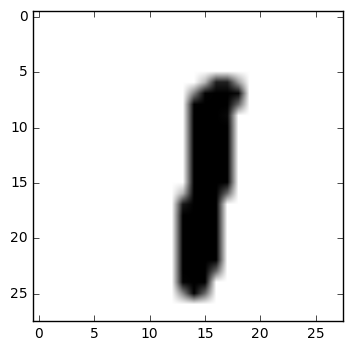

(1, 784)
[[  1.80935047e-18   3.19023693e-33   9.56186712e-01   2.89689388e-06
    1.48231307e-34   4.38103080e-02   1.10640819e-07   1.18897461e-08
    5.97631210e-18   9.27950235e-22]] 2


In [26]:
from skimage import io,color
from skimage.transform import resize

my_img = np.array(plt.imread('imgs/1.png'))
plt.imshow(my_img)
plt.show()
my_img = resize(my_img,(28,28,1)) #图片缩放到指定大小28*28
my_img = my_img.reshape(1,-1)
print(my_img.shape)
res = model.predict(my_img)
print(res,np.argmax(res))

# img = io.imread('imgs/3.png')
# img_gray = color.rgb2gray(img)
# io.imshow(img_gray)
# io.show()
# print(img_gray.shape)
# img_gray = img_gray.reshape(1,-1) #1表示一张图片，-1表示28*28
# res = model.predict(img_gray)
# print(res)
# print(np.argmax(res))

In [27]:
np.random.random((3,4)) #3*4 [0.0, 1.0)之间的浮点数
print(np.random.randint(10,size=(5,1))) #5*1 不超过10的随机整数
print(np.random.randint(1,10,size=(2,4))) #2*4 [1,10)之间的随机整数

[[9]
 [9]
 [8]
 [0]
 [8]]
[[3 1 6 4]
 [2 8 4 1]]


### 模型可视化：将一个model以图像的形式展现出来

In [32]:
import keras
import os 
from keras.utils import plot_model
os.environ["PATH"] += os.pathsep + 'F:/Python/Keras/Keras-Visualize/bin' #关联到Graphviz可执行文件的系统变量
#模型可视化
plot_model(model,to_file='imgs/model.png')

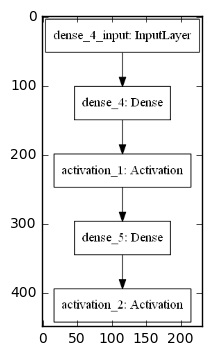

In [33]:
plt.imshow(plt.imread('imgs/model.png'))
plt.show()